In [9]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split



movies = pd.read_csv('./movies.csv')

In [10]:
movies.head()

,Unnamed: 0,title,Unnamed: 0.1,budget,genres,revenue,runtime,script,actor_1,actor_2,actor_3,director,rating,stars_out_of_10,writer,year,critical_success,financial_success
0,1,10 things i hate about you,0.0,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",53478166.0,97.0,\r\r\r\n\r\r\r\n\r\r\r\n\r\r\r\n<b><!--\r\r\r\...,Heath Ledger,Julia Stiles,Joseph Gordon-Levitt,Gil Junger,PG-13\r\r\r\n | \r\r\r\n,7.3,Karen McCullah,1999.0,1,1
1,3,12 and holding,2.0,400000.0,"[{'id': 18, 'name': 'Drama'}]",95687.0,90.0,\r\r\r\n \r\r\r\n \r\r\r\n ...,Conor Donovan,Jesse Camacho,Zoe Weizenbaum,Michael Cuesta,,7.6,Anthony Cipriano,2005.0,1,0
2,6,12 years a slave,4.0,20000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",187000000.0,134.0,\r\r\r\n\r\r\r\r\n\r\r\r\r\n\r\r\r\r\n ...,Chiwetel Ejiofor,Michael Kenneth Williams,Michael Fassbender,Steve McQueen,R\r\r\r\n | \r\r\r\n,8.1,John Ridley,2013.0,1,1
3,7,127 hours,5.0,18000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",35692920.0,94.0,\r\r\r\n\r\r\r\r\n\r\r\r\r\n \r\r\r\r\n ...,James Franco,Amber Tamblyn,Kate Mara,Danny Boyle,R\r\r\r\n | \r\r\r\n ...,7.6,Danny Boyle,2010.0,1,0
4,8,1492: conquest of paradise,6.0,47000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",7191399.0,154.0,\r\r\r\n\r\r\r\n\r\r\r\n\r\r\r\n\r\r\r\n1492: ...,Gérard Depardieu,Armand Assante,Sigourney Weaver,Ridley Scott,PG-13\r\r\r\n | \r\r\r\n ...,6.5,Rose Bosch,1992.0,0,0


In [37]:
movies['stars_out_of_10'].mean()

6.936075322101099

In [38]:
movies['year'].mean()

1997.94846382557

In [62]:
movies.sort_values(['stars_out_of_10'], ascending=[False]).head()

,Unnamed: 0,title,Unnamed: 0.1,budget,genres,revenue,runtime,script,actor_1,actor_2,actor_3,director,rating,stars_out_of_10,writer,year,critical_success,financial_success
903,1193,the shawshank redemption,948.0,25000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",28341469.0,142.0,\r\r\r\n\r\r\r\n\r\r\r\n\r\r\r\n<b><!--\r\r\r\...,Tim Robbins,Morgan Freeman,Bob Gunton,Frank Darabont,,9.3,Stephen King,1994.0,1,0
649,865,schindler's list,926.0,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",321365567.0,195.0,\r\r\r\n\r\r\r\n\r\r\r\n\r\r\r\n<b><!--\r\r\r\...,Liam Neeson,Ralph Fiennes,Ben Kingsley,Steven Spielberg,R\r\r\r\n | \r\r\r\n,8.9,Thomas Keneally,1993.0,1,1
606,814,pulp fiction,868.0,8000000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",213928762.0,154.0,"\r\r\r\n\r\r\r\n\r\r\r\n""PULP FICTION"" -- by Q...",John Travolta,Uma Thurman,Samuel L. Jackson,Quentin Tarantino,R\r\r\r\n |,8.9,Quentin Tarantino,1994.0,1,1
295,389,fight club,403.0,63000000.0,"[{'id': 18, 'name': 'Drama'}]",100853753.0,139.0,\r\r\r\n\r\r\r\n\r\r\r\n\r\r\r\n<b><!--\r\r\r\...,Brad Pitt,Edward Norton,Meat Loaf,David Fincher,,8.8,Chuck Palahniuk,1999.0,1,1
303,398,forrest gump,413.0,55000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",677945399.0,142.0,"\r\r\r\n\r\r\r\n\r\r\r\n""FORREST GUMP"" -- by E...",Tom Hanks,Robin Wright,Gary Sinise,Robert Zemeckis,PG-13\r\r\r\n,8.8,Winston Groom,1994.0,1,1


In [81]:
movies.sort_values(['year'], ascending=[False]).tail(50)

,Unnamed: 0,title,Unnamed: 0.1,budget,genres,revenue,runtime,script,actor_1,actor_2,actor_3,director,rating,stars_out_of_10,writer,year,critical_success,financial_success
299,393,five easy pieces,408.0,0.0,"[{'id': 18, 'name': 'Drama'}]",0.0,98.0,\r\r\r\n\r\r\r\n\r\r\r\n\r\r\r\n<b><!--\r\r\r\...,Jack Nicholson,Karen Black,Billy Green Bush,Bob Rafelson,R\r\r\r\n,7.5,Carole Eastman,1970.0,1,0
927,1225,the wild bunch,1152.0,6244087.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 37, '...",638641.0,145.0,\r\r\r\n\r\r\r\n\r\r\r\n\r\r\r\n ...,William Holden,Ernest Borgnine,Robert Ryan,Sam Peckinpah,R\r\r\r\n | \r\r\r\n ...,8.0,Walon Green,1969.0,1,0
514,683,midnight cowboy,736.0,3600000.0,"[{'id': 18, 'name': 'Drama'}]",44785053.0,113.0,\r\r\r\n\r\r\r\n\r\r\r\n\r\r\r\n<b><!--\r\r\r\...,Dustin Hoffman,Jon Voight,Sylvia Miles,John Schlesinger,,7.9,Waldo Salt,1969.0,1,1
585,782,petulia,834.0,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",0.0,105.0,\r\r\r\n\r\r\r\n\r\r\r\n\r\r\r\n \r\r\r\n ...,Julie Christie,George C. Scott,Richard Chamberlain,Richard Lester,R\r\r\r\n |,7.3,Lawrence B. Marcus,1968.0,1,0
7,12,2001: a space odyssey,10.0,10500000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",68700000.0,149.0,\r\r\r\n\r\r\r\n\r\r\r\n\r\r\r\n\r\r\r\n2001: ...,Keir Dullea,Gary Lockwood,William Sylvester,Stanley Kubrick,G\r\r\r\n |,8.3,Stanley Kubrick,1968.0,1,1
810,1083,the graduate,477.0,3000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",104945305.0,106.0,\r\r\r\n\r\r\r\n\r\r\r\n\r\r\r\n<b><!--\r\r\r\...,Dustin Hoffman,Anne Bancroft,Katharine Ross,Mike Nichols,PG\r\r\r\n | \r\r\r\n,8.0,Calder Willingham,1967.0,1,1
135,195,bonnie and clyde,192.0,2500000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",50700000.0,111.0,\r\r\r\n\r\r\r\n\r\r\r\n ...,Warren Beatty,Faye Dunaway,Michael J. Pollard,Arthur Penn,R\r\r\r\n | \r\r\r\n,7.9,David Newman,1967.0,1,1
753,1006,the battle of algiers,141.0,800000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",921548.0,121.0,\r\r\r\n\r\r\r\n\r\r\r\n<b><!--\r\r\r\n</b>if ...,Brahim Hadjadj,Jean Martin,Yacef Saadi,Gillo Pontecorvo,Not Rated\r\r\r\n |,8.1,Franco Solinas,1966.0,1,0
781,1040,the cincinnati kid,255.0,0.0,"[{'id': 18, 'name': 'Drama'}]",15260000.0,102.0,\r\r\r\n\r\r\r\n\r\r\r\n\r\r\r\n ...,Steve McQueen,Ann-Margret,Edward G. Robinson,Norman Jewison,TV-1,7.3,Richard Jessup,1965.0,1,0
570,765,orgy of the dead,812.0,0.0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 27, 'na...",0.0,92.0,\r\r\r\n\r\r\r\n\r\r\r\nOrgy of the Dead\r\r\r...,Criswell,Fawn Silver,Pat Barrington,Stephen C. Apostolof,Unrated\r\r\r\n |,2.8,Edward D. Wood Jr.,1965.0,0,0


In [82]:
import seaborn as sns

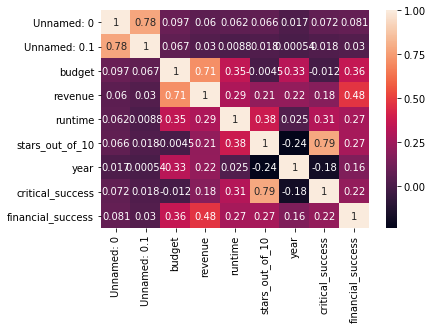

In [83]:
sns.heatmap(movies.corr(), annot=True)

In [46]:
movies['revenue'].mean()

123763970.41328047

In [60]:
movie.describe()

,Unnamed: 0,Unnamed: 0.1,budget,revenue,runtime,stars_out_of_10,year,critical_success,financial_success
count,1009.000000,1009.000000,1.009000e+03,1.009000e+03,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,672.019822,581.946482,3.414533e+07,1.237640e+08,112.740337,6.936075,1997.948464,0.540139,0.536174
std,384.908719,335.927730,4.099846e+07,2.139060e+08,20.614950,0.948666,14.410208,0.498633,0.498937
min,1.000000,0.000000,0.000000e+00,0.000000e+00,11.000000,2.300000,1928.000000,0.000000,0.000000
25%,333.000000,286.000000,5.000000e+06,8.175346e+06,98.000000,6.400000,1993.000000,0.000000,0.000000
50%,673.000000,582.000000,2.000000e+07,4.842806e+07,109.000000,7.000000,2000.000000,1.000000,1.000000
75%,1009.000000,875.000000,4.800000e+07,1.417747e+08,124.000000,7.600000,2009.000000,1.000000,1.000000
max,1344.000000,1167.000000,2.500000e+08,2.787965e+09,202.000000,9.300000,2017.000000,1.000000,1.000000


In [45]:
movies['actor_1'].value_counts().head(20)

Denzel Washington        15
Robert De Niro           13
Tom Cruise               13
Bruce Willis             11
Nicolas Cage             11
Tom Hanks                11
Johnny Depp              11
George Clooney           10
Leonardo DiCaprio        10
Keanu Reeves              9
Will Smith                9
Jim Carrey                9
Brad Pitt                 8
Kevin Costner             8
Val Kilmer                8
Christian Bale            8
Arnold Schwarzenegger     7
Kurt Russell              7
Jeff Bridges              7
Harrison Ford             7
Name: actor_1, dtype: int64

In [27]:
movies_dummies = pd.get_dummies(data=movies, columns=['actor_1', 'actor_2', 'actor_3', 'director','writer'])

In [29]:
del movies_dummies['Unnamed: 0']

In [30]:
del movies_dummies['Unnamed: 0.1']

In [31]:
movies_dummies.head()

,title,budget,genres,revenue,runtime,script,rating,stars_out_of_10,year,critical_success,...,writer_William Nicholson,writer_William Rose,writer_William Steig,writer_Winston Groom,writer_Wolfgang Petersen,writer_Woody Allen,writer_Yann Martel,writer_Zach Braff,writer_Zak Penn,writer_Zoë Lund
0,10 things i hate about you,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",53478166.0,97.0,\r\r\r\n\r\r\r\n\r\r\r\n\r\r\r\n<b><!--\r\r\r\...,PG-13\r\r\r\n | \r\r\r\n,7.3,1999.0,1,...,0,0,0,0,0,0,0,0,0,0
1,12 and holding,400000.0,"[{'id': 18, 'name': 'Drama'}]",95687.0,90.0,\r\r\r\n \r\r\r\n \r\r\r\n ...,,7.6,2005.0,1,...,0,0,0,0,0,0,0,0,0,0
2,12 years a slave,20000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",187000000.0,134.0,\r\r\r\n\r\r\r\r\n\r\r\r\r\n\r\r\r\r\n ...,R\r\r\r\n | \r\r\r\n,8.1,2013.0,1,...,0,0,0,0,0,0,0,0,0,0
3,127 hours,18000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",35692920.0,94.0,\r\r\r\n\r\r\r\r\n\r\r\r\r\n \r\r\r\r\n ...,R\r\r\r\n | \r\r\r\n ...,7.6,2010.0,1,...,0,0,0,0,0,0,0,0,0,0
4,1492: conquest of paradise,47000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",7191399.0,154.0,\r\r\r\n\r\r\r\n\r\r\r\n\r\r\r\n\r\r\r\n1492: ...,PG-13\r\r\r\n | \r\r\r\n ...,6.5,1992.0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
movies_dummies.to_csv('movies_dummies.csv', index = False)

In [35]:
pd.read_csv('./movies_dummies.csv')

,title,budget,genres,revenue,runtime,script,rating,stars_out_of_10,year,critical_success,...,writer_William Nicholson,writer_William Rose,writer_William Steig,writer_Winston Groom,writer_Wolfgang Petersen,writer_Woody Allen,writer_Yann Martel,writer_Zach Braff,writer_Zak Penn,writer_Zoë Lund
0,10 things i hate about you,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",53478166.0,97.0,\r\r\r\r\n\r\r\r\r\n\r\r\r\r\n\r\r\r\r\n<b><!-...,PG-13\r\r\r\r\n | \r\r\r\r\n ...,7.3,1999.0,1,...,0,0,0,0,0,0,0,0,0,0
1,12 and holding,400000.0,"[{'id': 18, 'name': 'Drama'}]",95687.0,90.0,\r\r\r\r\n \r\r\r\r\n \r\r\...,,7.6,2005.0,1,...,0,0,0,0,0,0,0,0,0,0
2,12 years a slave,20000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",187000000.0,134.0,\r\r\r\r\n\r\r\r\r\r\n\r\r\r\r\r\n\r\r\r\r\r\n...,R\r\r\r\r\n | \r\r\r\r\n ...,8.1,2013.0,1,...,0,0,0,0,0,0,0,0,0,0
3,127 hours,18000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",35692920.0,94.0,\r\r\r\r\n\r\r\r\r\r\n\r\r\r\r\r\n \r\r\r\r\r\...,R\r\r\r\r\n | \r\r\r\r\n ...,7.6,2010.0,1,...,0,0,0,0,0,0,0,0,0,0
4,1492: conquest of paradise,47000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",7191399.0,154.0,\r\r\r\r\n\r\r\r\r\n\r\r\r\r\n\r\r\r\r\n\r\r\r...,PG-13\r\r\r\r\n | \r\r\r\r\n ...,6.5,1992.0,0,...,0,0,0,0,0,0,0,0,0,0
5,15 minutes,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",56359980.0,120.0,\r\r\r\r\n\r\r\r\r\n\r\r\r\r\n\r\r\r\r\n<b><!-...,R\r\r\r\r\n | \r\r\r\r\n,6.1,2001.0,0,...,0,0,0,0,0,0,0,0,0,0
6,17 again,20000000.0,"[{'id': 35, 'name': 'Comedy'}]",136267476.0,102.0,\r\r\r\r\n\r\r\r\r\n \r\r\r\r\n ...,PG-13\r\r\r\r\n | \r\r\r\r\n ...,6.4,2009.0,0,...,0,0,0,0,0,0,0,0,0,0
7,2001: a space odyssey,10500000.0,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",68700000.0,149.0,\r\r\r\r\n\r\r\r\r\n\r\r\r\r\n\r\r\r\r\n\r\r\r...,G\r\r\r\r\n |,8.3,1968.0,1,...,0,0,0,0,0,0,0,0,0,0
8,2012,200000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",769653595.0,158.0,\r\r\r\r\n \r\r\r\r\n \r\r\...,PG-13\r\r\r\r\n | \r\r\r\r\n ...,5.8,2009.0,0,...,0,0,0,0,0,0,0,0,0,0
9,25th hour,15000000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",13060843.0,135.0,\r\r\r\r\r\n\r\r\r\r\r\nTHE 25th HOUR\r\r\r\r\...,,7.7,2002.0,1,...,0,0,0,0,0,0,0,0,0,0


In [84]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

In [86]:
# # Reads file  
# df = movies['script']
  
# comment_words = ' '
# stopwords = set(STOPWORDS) 
  
# # iterate through the csv file 
# for val in df: 
      
#     # typecaste each val to string 
#     val = str(val) 
  
#     # split the value 
#     tokens = val.split() 
      
#     # Converts each token into lowercase 
#     for i in range(len(tokens)): 
#         tokens[i] = tokens[i].lower() 
          
#     for words in tokens: 
#         comment_words = comment_words + words + ' '
    
# wordcloud = WordCloud(width = 800, height = 800, 
#                 background_color ='white', 
#                 stopwords = stopwords, 
#                 min_font_size = 10).generate(comment_words) 
  
# # plot the WordCloud image                        
# plt.figure(figsize = (8, 8), facecolor = None) 
# plt.imshow(wordcloud) 
# plt.axis("off") 
# plt.tight_layout(pad = 0) 
  
# plt.show() 